<center><h1>EE69205: Signal Processing System Design</h1></center>
<center> <h2>Experiment-1: DFT, FFT, DCT</h2> </center>
<center> <h3>Anirvan Krishna | 21EE38002</h3> </center>

## Objective
To study and implement Discrete Fourier Transform, Fast Fourier Transform and Discrete Cosine Transform on a given signal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Original Signal

Signal details:

$$x(t) = \sin{(2\pi\cdot50t)} + \frac{1}{3} \cos{(2\pi\cdot150t)}$$

Sampling Frequency: $$F_s = 1500 Hz$$

In [40]:
t = np.arange(0, 0.2, 1/1500)
x = np.sin(2*np.pi*50*t) + (1/3)*np.cos(2*np.pi*150*t)

Text(0.5, 1.0, 'Signal: $x[n]$ vs. $n$')

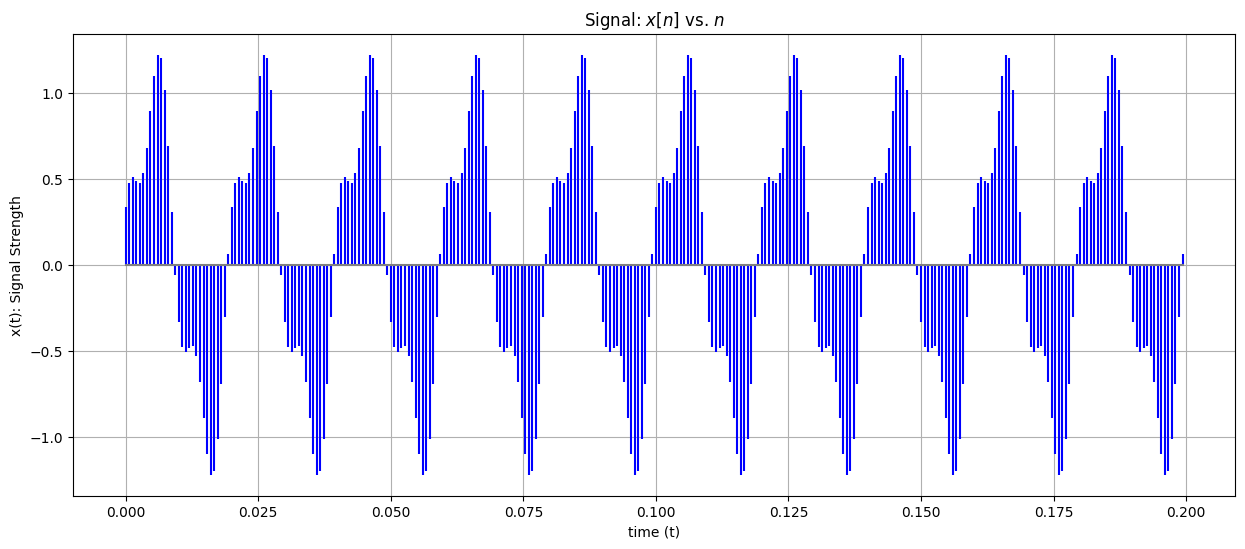

In [41]:
plt.figure(figsize=(15, 6), dpi=100)
plt.stem(t, x, linefmt='b-', markerfmt=' ', basefmt="gray")
plt.grid()
plt.xlabel('time (t)')
plt.ylabel('x(t): Signal Strength')
plt.title('Signal: $x[n]$ vs. $n$')

## Discrete Fourier Transform

Signal details:

$$x(t) = \sin{(2\pi\cdot50t)} + \frac{1}{3} \cos{(2\pi\cdot150t)}$$
$$F_s = 1500 Hz$$

For a signal $x[n]$ where $n=0,1,2,...,N-1$, discrete fourier transform $X(k)$ is given as:
$$X(k) = \sum_{n=0}^{N-1} x[n] \cdot \exp(-j \frac{2\pi n k}{N})$$

In [169]:
def dft(x, fs):
    """
    x: input signal
    fs: sampling rate of the input signal
    """
    N = len(x)
    X = np.zeros(N, dtype=complex)

    # Compute the DFT
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)

    # Frequency vector
    freq = np.fft.fftfreq(N, 1/fs)

    # Compute phase
    phase = np.angle(X)

    return X, phase, freq

Text(0.5, 1.0, 'Phase: $X[k]$ vs. $Frequency$')

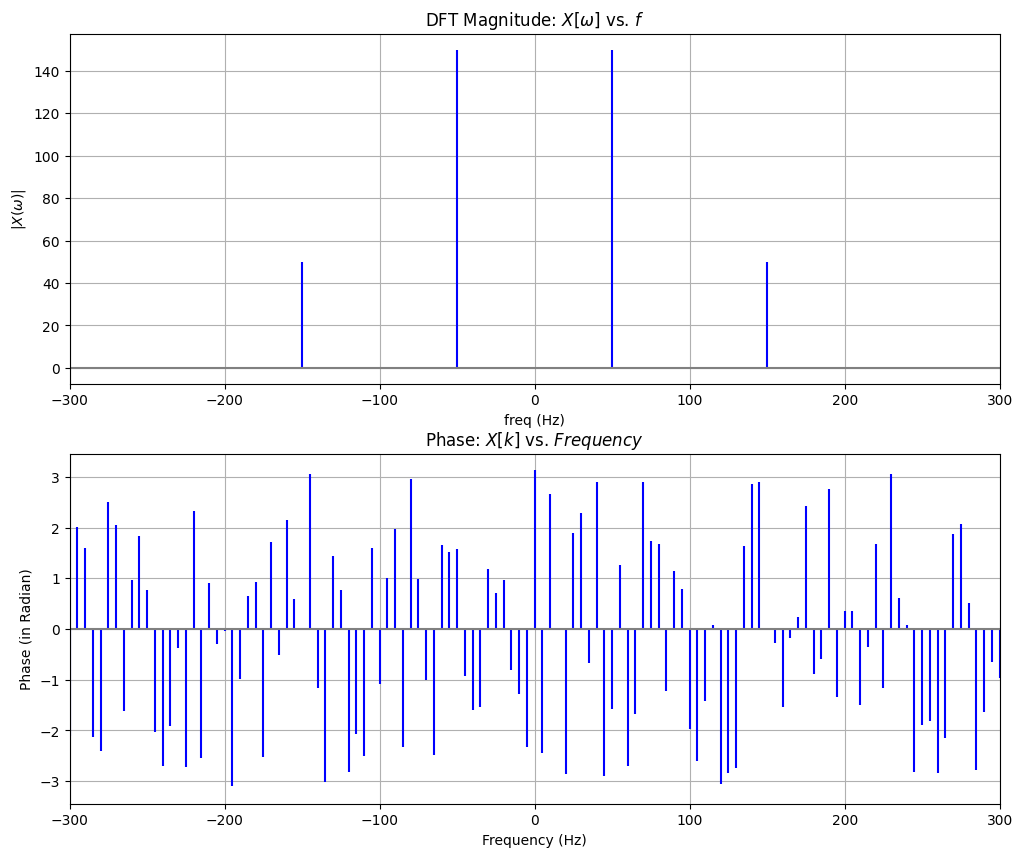

In [117]:
X, phase, freq = dft(x, fs=1500)

plt.figure(figsize=(12, 10), dpi=100)

plt.subplot(2, 1, 1)
plt.stem(freq, np.abs(X), linefmt='b-', markerfmt=' ', basefmt="gray")
plt.grid()
plt.xlim(-300, 300)
plt.xlabel('freq (Hz)')
plt.ylabel('$|X(\omega)|$')
plt.title('DFT Magnitude: $X[\omega]$ vs. $f$')

plt.subplot(2, 1, 2)
plt.stem(freq, phase, linefmt='b-', markerfmt=' ', basefmt="gray")
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.xlim(-300, 300)
plt.ylabel('Phase (in Radian)')
plt.title('Phase: $X[k]$ vs. $Frequency$')

## Discrete Cosine Transform

For a signal $x[n]$, where $n = 0, 1, 2,..., N-1$ the discrete cosine transform $X(k)$ is defined as:

 $$X(k) = \sqrt{\frac{2}{N}} \cdot c_{(k)}\sum_{n=0}^{N-1}{x[n]\cdot \cos[\frac{\pi k}{N} (n+\frac{1}{2})]}$$

 $$ c_{(k)} = \begin{cases} \frac{1}{\sqrt{2}} & \text{k = 0} \\ 1 & \text{k = 1, 2, ..., N-1} \end{cases}$$

Original Signal details:

$$x(t) = \sin{(2\pi\cdot50t)} + \frac{1}{3} \cos{(2\pi\cdot150t)}$$

$$F_s = 1500 Hz$$

In [170]:
def DCT(x, fs):
    """
    x: input signal
    fs: sampling rate of the input signal
    """
    N = len(x)

    Xp = np.zeros(N)

    freq1 = 0.5 * np.arange(N) * fs / N
    freq2 = 0.5 * np.arange(1-N, 1) * fs/N

    c = np.ones(N)
    c[0] = (0.5)**0.5

    for k in range(N):
        for n in range(N):
            Xp[k] += c[k]*x[n] * np.cos(np.pi * k * (n + 0.5) / N)

    Xn = Xp[-1::-1]

    X = ((2 / N)**0.5) * np.concatenate([Xn, Xp])
    X[np.abs(X) < 1e-03] = 0

    return X, np.concatenate([freq2, freq1])

Text(0.5, 1.0, 'DCT: $X[2\\pi f]$ vs. f (Hz)')

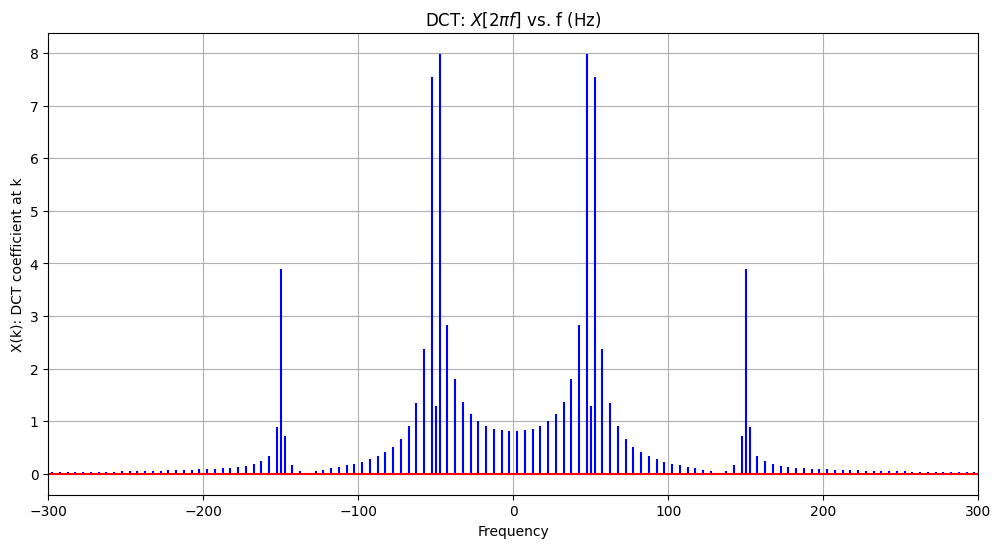

In [119]:
X, freq = DCT(x, fs=1500)

plt.figure(figsize=(12, 6), dpi=100)
plt.stem(freq, np.abs(X), linefmt='b-', markerfmt=' ', basefmt="red")
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('X(k): DCT coefficient at k')
plt.xlim(-300, 300)
plt.title('DCT: $X[2\pi f]$ vs. f (Hz)')

## Discrete Sine Transform

For a signal $x[n]$, where $n = 0, 1, 2,..., N-1$ the discrete sine transform $X(k)$ is defined as:

 $$X(k) = \sum_{n=1}^{N}{x[n]\cdot \sin[\frac{\pi k n }{N+1}]}$$

Original Signal details:

$$x(t) = \sin{(2\pi\cdot50t)} + \frac{1}{3} \cos{(2\pi\cdot150t)}$$
$$F_s = 1500 Hz$$

In [171]:
def DST(x, fs):
    """
    x: input signal
    fs: sampling frequency
    """
    N = len(x)
    X = np.zeros(N)

    for k in range(1, N + 1):
        for n in range(1, N + 1):
            X[k-1] += x[n-1] * np.sin(np.pi * k * n / (N + 1))

    X *= (2 / (N + 1)) ** 0.5

    # Create the frequency vector for positive and negative frequencies
    freq_pos = fs * np.arange(1, N + 1) / (2 * (N + 1))
    freq_neg = fs * np.arange(-N, 0) / (2 * (N + 1))
    freq = np.concatenate([freq_neg, freq_pos])

    # Mirror the positive part for negative frequencies
    X_full = np.zeros(2 * N, dtype=complex)
    X_full[:N] = X[::-1]
    X_full[N:] = X

    return X_full, freq

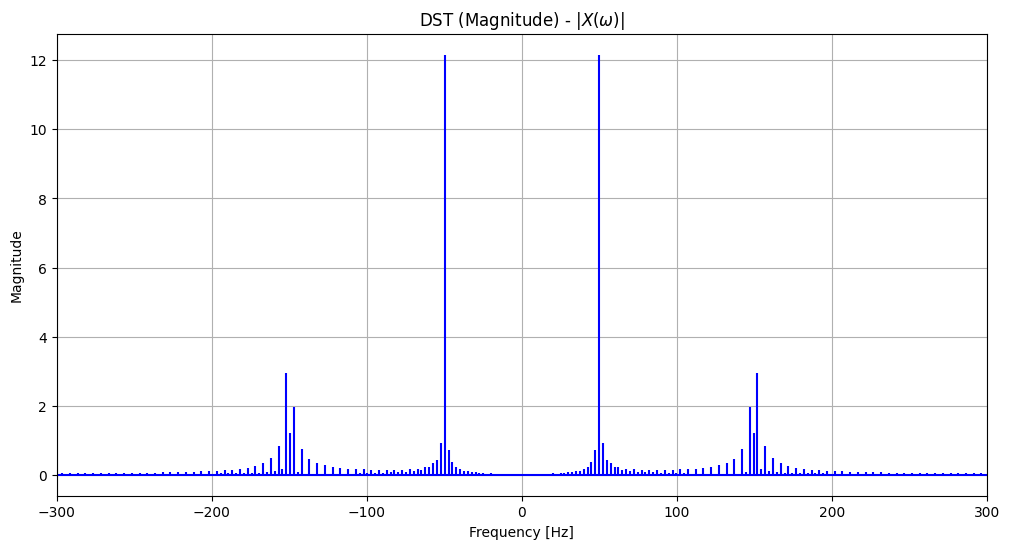

In [120]:
# Compute the DST
X, freq = DST(x, fs)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the magnitude of the DST
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b", label='Custom DST')
plt.title('DST (Magnitude) - $|X(\omega)|$')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(-300, 300)
plt.grid()

Text(0.5, 1.0, 'DST: $X[k]$ vs. $k$')

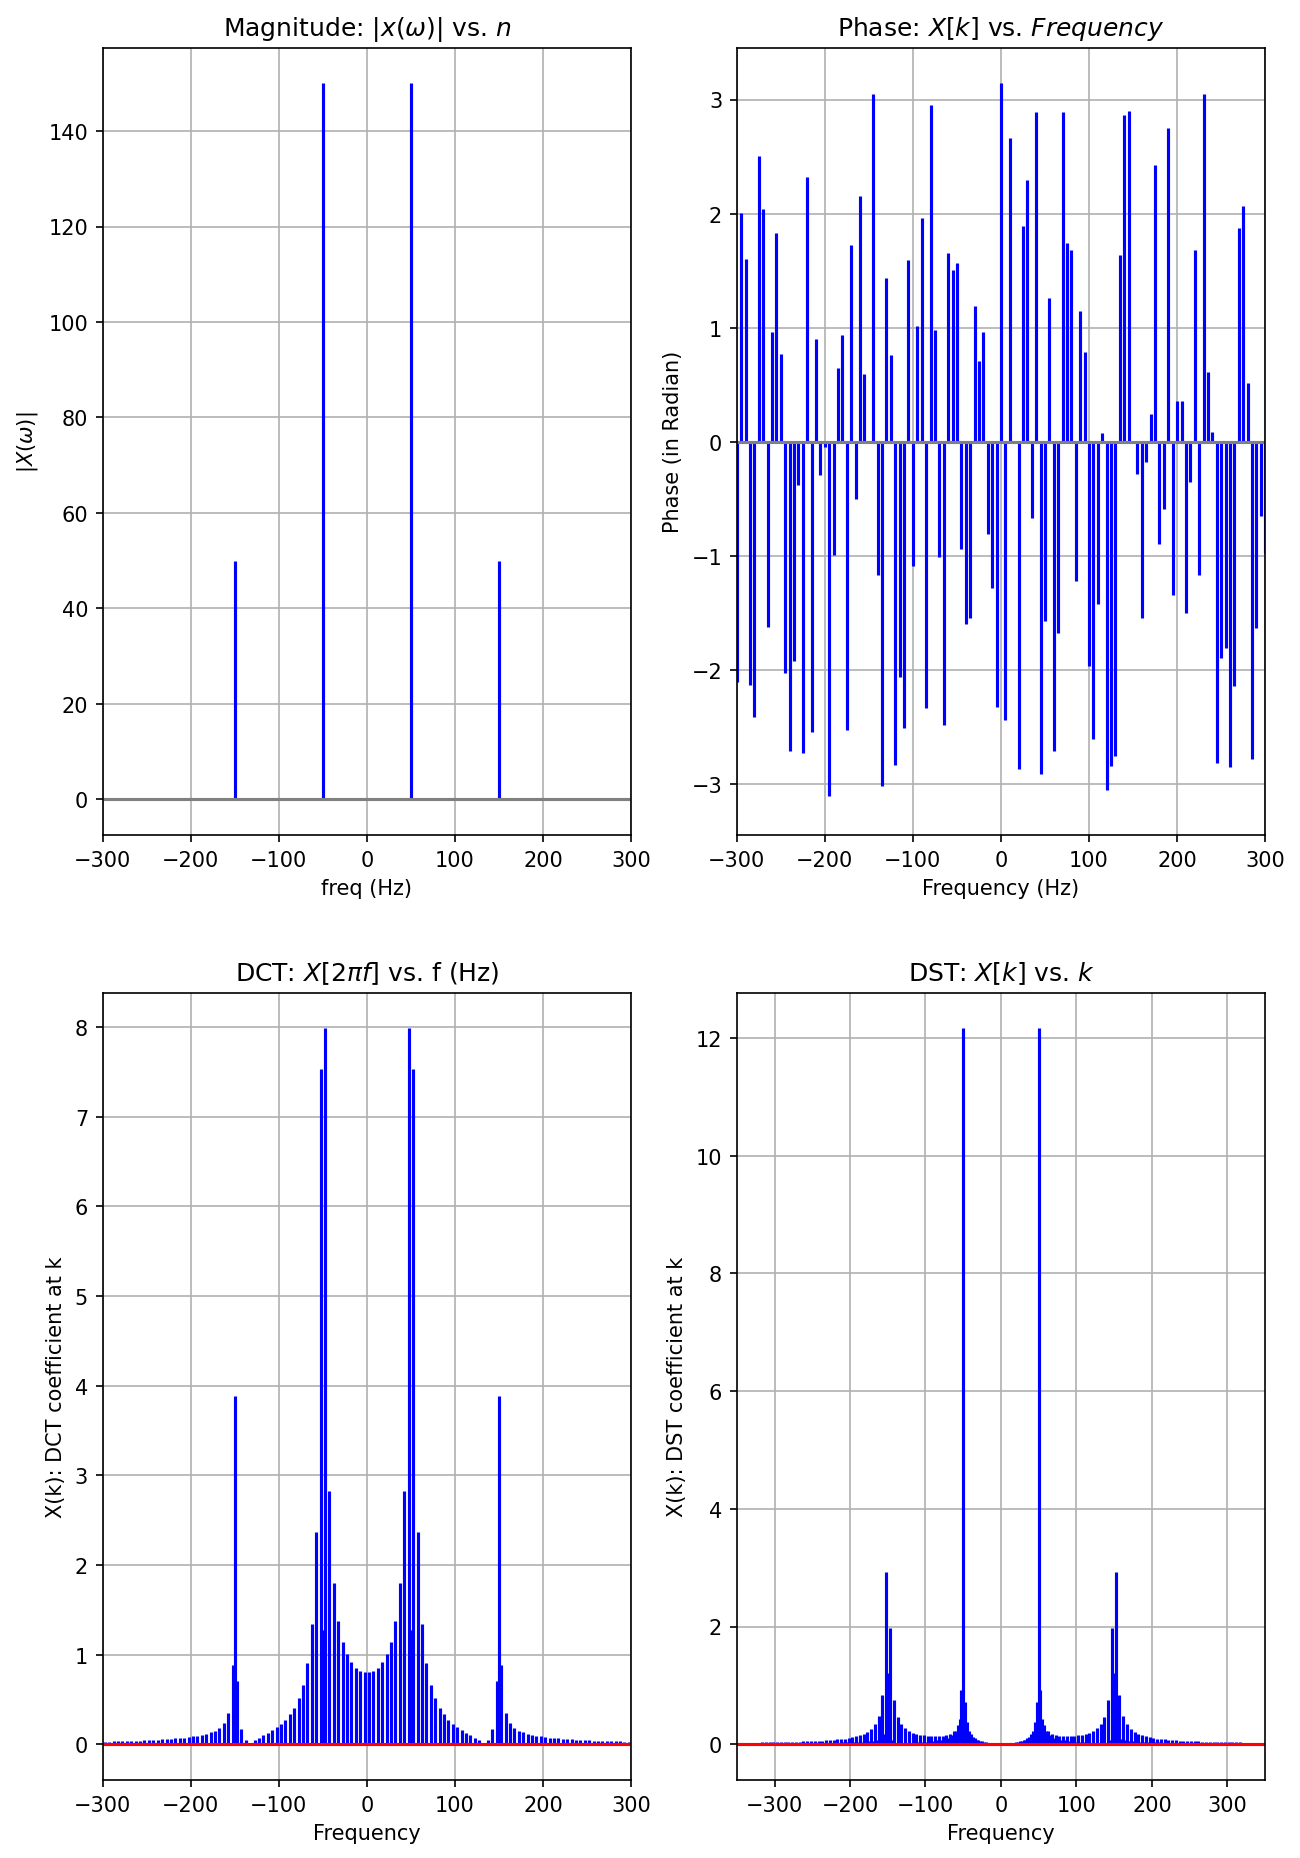

In [118]:
plt.figure(figsize=(10, 15), dpi=150)

X_dft, phase, freq = dft(x, fs=1500)

plt.subplot(2, 2, 1)
plt.stem(freq, np.abs(X_dft), linefmt='b-', markerfmt=' ', basefmt="gray")
plt.grid()
plt.xlim(-300, 300)
plt.xlabel('freq (Hz)')
plt.ylabel('$|X(\omega)|$')
plt.title('Magnitude: $|x(\omega)|$ vs. $n$')

plt.subplot(2, 2, 2)
plt.stem(freq, phase, linefmt='b-', markerfmt=' ', basefmt="gray")
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.xlim(-300, 300)
plt.ylabel('Phase (in Radian)')
plt.title('Phase: $X[k]$ vs. $Frequency$')

X_dct, freq = DCT(x, fs=1500)

plt.subplot(2, 2, 3)
plt.stem(freq, np.abs(X_dct), linefmt='b-', markerfmt=' ', basefmt="red")
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('X(k): DCT coefficient at k')
plt.xlim(-300, 300)
plt.title('DCT: $X[2\pi f]$ vs. f (Hz)')

X_dst, freq = DST(x, fs=1500)

plt.subplot(2, 2, 4)
plt.stem(freq, np.abs(X_dst), linefmt='b-', markerfmt=' ', basefmt="red")
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('X(k): DST coefficient at k')
plt.xlim(-350, 350)
plt.title('DST: $X[k]$ vs. $k$')

## Inverse Functions: IDFT, IDCT, IDST
### Inverse Discrete Fourier Transform (IDFT)

The formula for the Inverse Discrete Fourier Transform (IDFT) is given by:

$$ x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{j \frac{2\pi}{N} kn} $$

where:
- $x[n]$ is the $n$-th sample of the time-domain signal.
- $ X[k] $ is the $k$-th sample of the frequency-domain signal.
- $ N $ is the total number of samples.
- $ j $ is the imaginary unit.

### Inverse Discrete Cosine Transform (IDCT)

The formula for the Inverse Discrete Cosine Transform (IDCT) is given by:

$$ x[n] = \frac{1}{2} c_0 + \sum_{k=1}^{N-1} c_k \cos \left( \frac{\pi}{N} k \left( n + \frac{1}{2} \right) \right) $$

where:
- $x[n]$ is the $n$-th sample of the time-domain signal.
- $c_k$ is the $k$-th DCT coefficient.
- $N$ is the total number of samples.
- $c_0$ is the DC coefficient.

### Inverse Discrete Sine Transform (IDST)

The formula for the Inverse Discrete Sine Transform (IDST) is given by:

$$ x[n] = \sum_{k=1}^{N} X[k] \sin \left( \frac{\pi}{N+1} k n \right) $$

where:
- $ x[n] $ is the $ n $-th sample of the time-domain signal.
- $ X[k] $ is the $ k $-th DST coefficient.
- $ N $ is the total number of samples.

In [173]:
def idft(X, fs):
    """
    X: transformed signal (output of DFT)
    fs: sampling rate of the input signal
    """
    N = len(X)
    x = np.zeros(N, dtype=complex)

    # Compute the IDFT
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)

    x /= N  # Normalize by the number of points

    return x.real  # Return the real part as the original signal should be real


def idst(X, fs):
    """
    X: transformed signal (output of DST)
    fs: sampling frequency
    """
    N = len(X) // 2
    X_pos = X[N:]

    x = np.zeros(N)

    for n in range(1, N + 1):
        for k in range(1, N + 1):
            x[n-1] += X_pos[k-1] * np.sin(np.pi * k * n / (N + 1))

    x *= (2 / (N + 1)) ** 0.5

    return x


def idct(X, fs):
    """
    X: transformed signal (output of DCT)
    fs: sampling rate of the input signal
    """
    N = len(X) // 2
    X_pos = X[N:]
    c = np.ones(N)
    c[0] = (0.5)**0.5

    x = np.zeros(N)

    for n in range(N):
        for k in range(N):
            x[n] += c[k] * X_pos[k] * np.cos(np.pi * k * (n + 0.5) / N)

    x *= (2 / N) ** 0.5

    return x

## Signal Compression and Reconstruction

Following the transformation, we attempt to reconstruct the original signal from their transformed counterparts. We perfrom the reconstruction steps by retaining top \(p\%\) of the coefficients in the corresponding transform (DFT, DCT and DST). The reconstruction is then performed and we calculate mean squared error between the reconstructed signal and original signal. The motive is to obtain a sweet-spot between the compression factor and the signal quality.

$$x[n] \xrightarrow{\text{DFT/DCT/DST}} X(\omega) \xrightarrow{\text{retain top } p\% \text{ coefficients}} \hat{X}(\omega) \xrightarrow{\text{IDFT/IDCT/IDST}} \hat{x}[n]$$

We want to find the maximum value of $p$ such that we have the minimum value of $\left\| x[n] - \hat{x}[n] \right\|_{2}$

In [200]:
def retain_top_p_percent(X, p):
    """
    Retain the top p% of coefficients in the transform X.
    """
    N = len(X)
    X_abs_sorted = np.sort(np.abs(X))[::-1]
    threshold_index = int(N * p / 100)
    threshold_value = X_abs_sorted[threshold_index-1]

    X_new = np.where(np.abs(X) >= threshold_value, X, 0)

    return X_new

In [219]:
def compare_transforms(x, fs, p):

    N = len(x)
    # Compute forward transforms
    X_dft, _, _ = dft(x, fs)
    X_dct, _ = DCT(x, fs)
    X_dst, _ = DST(x, fs)

    X_dft = retain_top_p_percent(X_dft, p)
    X_dct = retain_top_p_percent(X_dct, p)
    X_dst = retain_top_p_percent(X_dst, p)

    # Compute inverse transforms
    x_idft = idft(X_dft, fs)
    x_idct = idct(X_dct, fs)
    x_idst = idst(X_dst, fs)

    # Mean Squared Error Calculations
    mse_idft = np.mean((x - x_idft) ** 2)
    mse_idct = np.mean((x - x_idct) ** 2)
    mse_idst = np.mean((x - x_idst) ** 2)

    print(f"Mean Squared Error between Original and Reconstructed Signal for {p}% retention")
    print(f'MSE IDFT: {mse_idft:.4f}')
    print(f'MSE IDCT: {mse_idct:.4f}')
    print(f'MSE IDST: {mse_idst:.4f}')

    # Plot the results
    plt.figure(figsize=(18, 12))

    # Plot the original signal
    plt.subplot(2, 2, 1)
    plt.stem(x, label='Original Signal', linefmt='r-',
             markerfmt=' ', basefmt="red")
    plt.xlim(-1, min(N, 150))
    plt.title('Original Signal')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot the IDFT result
    plt.subplot(2, 2, 2)
    plt.stem(x_idft, label='IDFT Result', linefmt='r-',
             markerfmt=' ', basefmt="red")
    plt.xlim(-1, min(N, 150))
    plt.title('IDFT')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot the IDCT result
    plt.subplot(2, 2, 3)
    plt.stem(x_idct, label='IDCT Result', linefmt='r-',
             markerfmt=' ', basefmt="red")
    plt.title('IDCT')
    plt.xlim(-1, min(N, 150))
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot the IDST result
    plt.subplot(2, 2, 4)
    plt.stem(x_idst, label='IDST Result', linefmt='r-',
             markerfmt=' ', basefmt="red")
    plt.title('IDST')
    plt.xlim(-1, min(N, 150))
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.tight_layout()
    plt.show()

C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_8700\4014572163.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n-1] += X_pos[k-1] * np.sin(np.pi * k * n / (N + 1))


Mean Squared Error between Original and Reconstructed Signal for 100% retention
MSE IDFT: 0.0000
MSE IDCT: 0.0000
MSE IDST: 0.0000


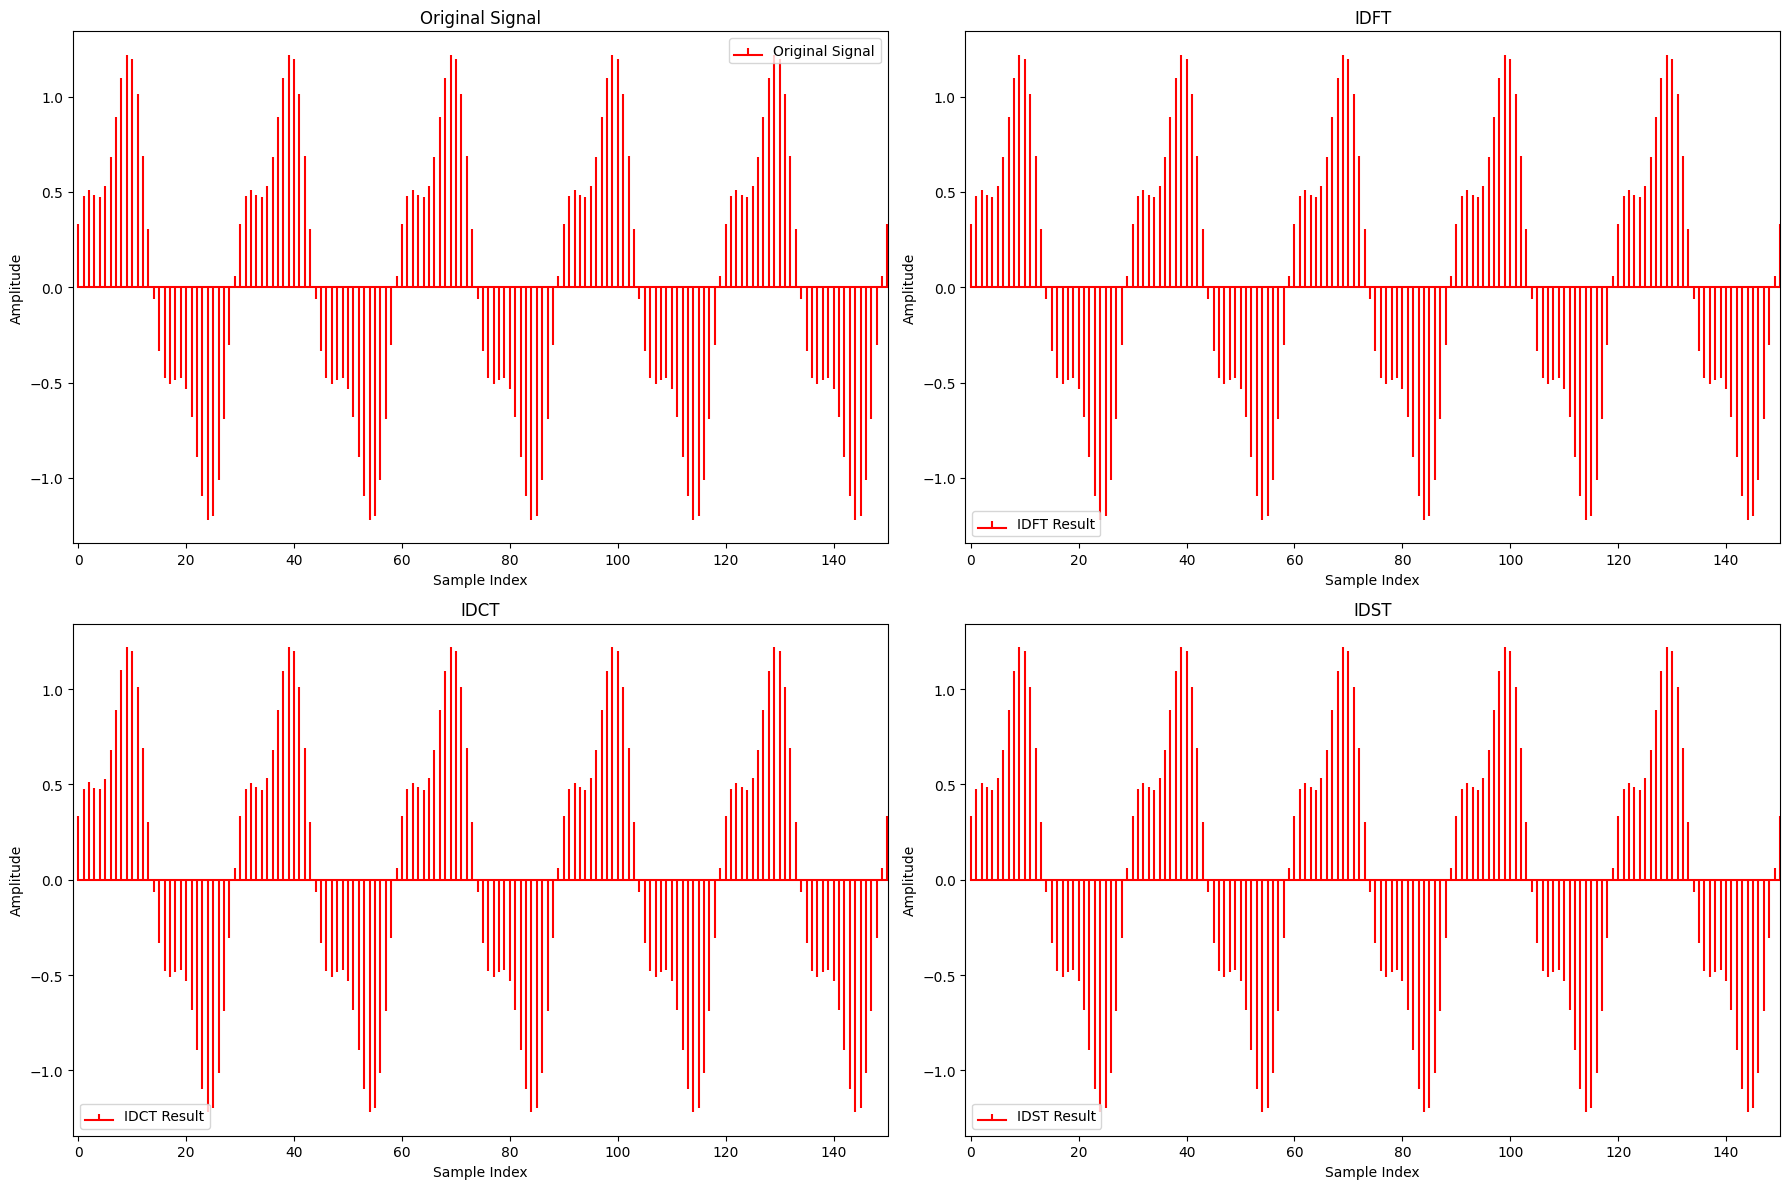

In [220]:
# Example usage
fs = 1500  # Sampling frequency
t_max = 1  # Duration in seconds
N = fs * t_max
t = np.linspace(0, t_max, int(N), endpoint=False)  # Time vector

# Define the signal
x_t = np.sin(2 * np.pi * 50 * t) + (1/3) * np.cos(2 * np.pi * 150 * t)

# Perform the comparison
compare_transforms(x_t, fs, 100)

C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_8700\4014572163.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n-1] += X_pos[k-1] * np.sin(np.pi * k * n / (N + 1))


Mean Squared Error between Original and Reconstructed Signal for 50% retention
MSE IDFT: 0.0000
MSE IDCT: 0.0000
MSE IDST: 0.0000


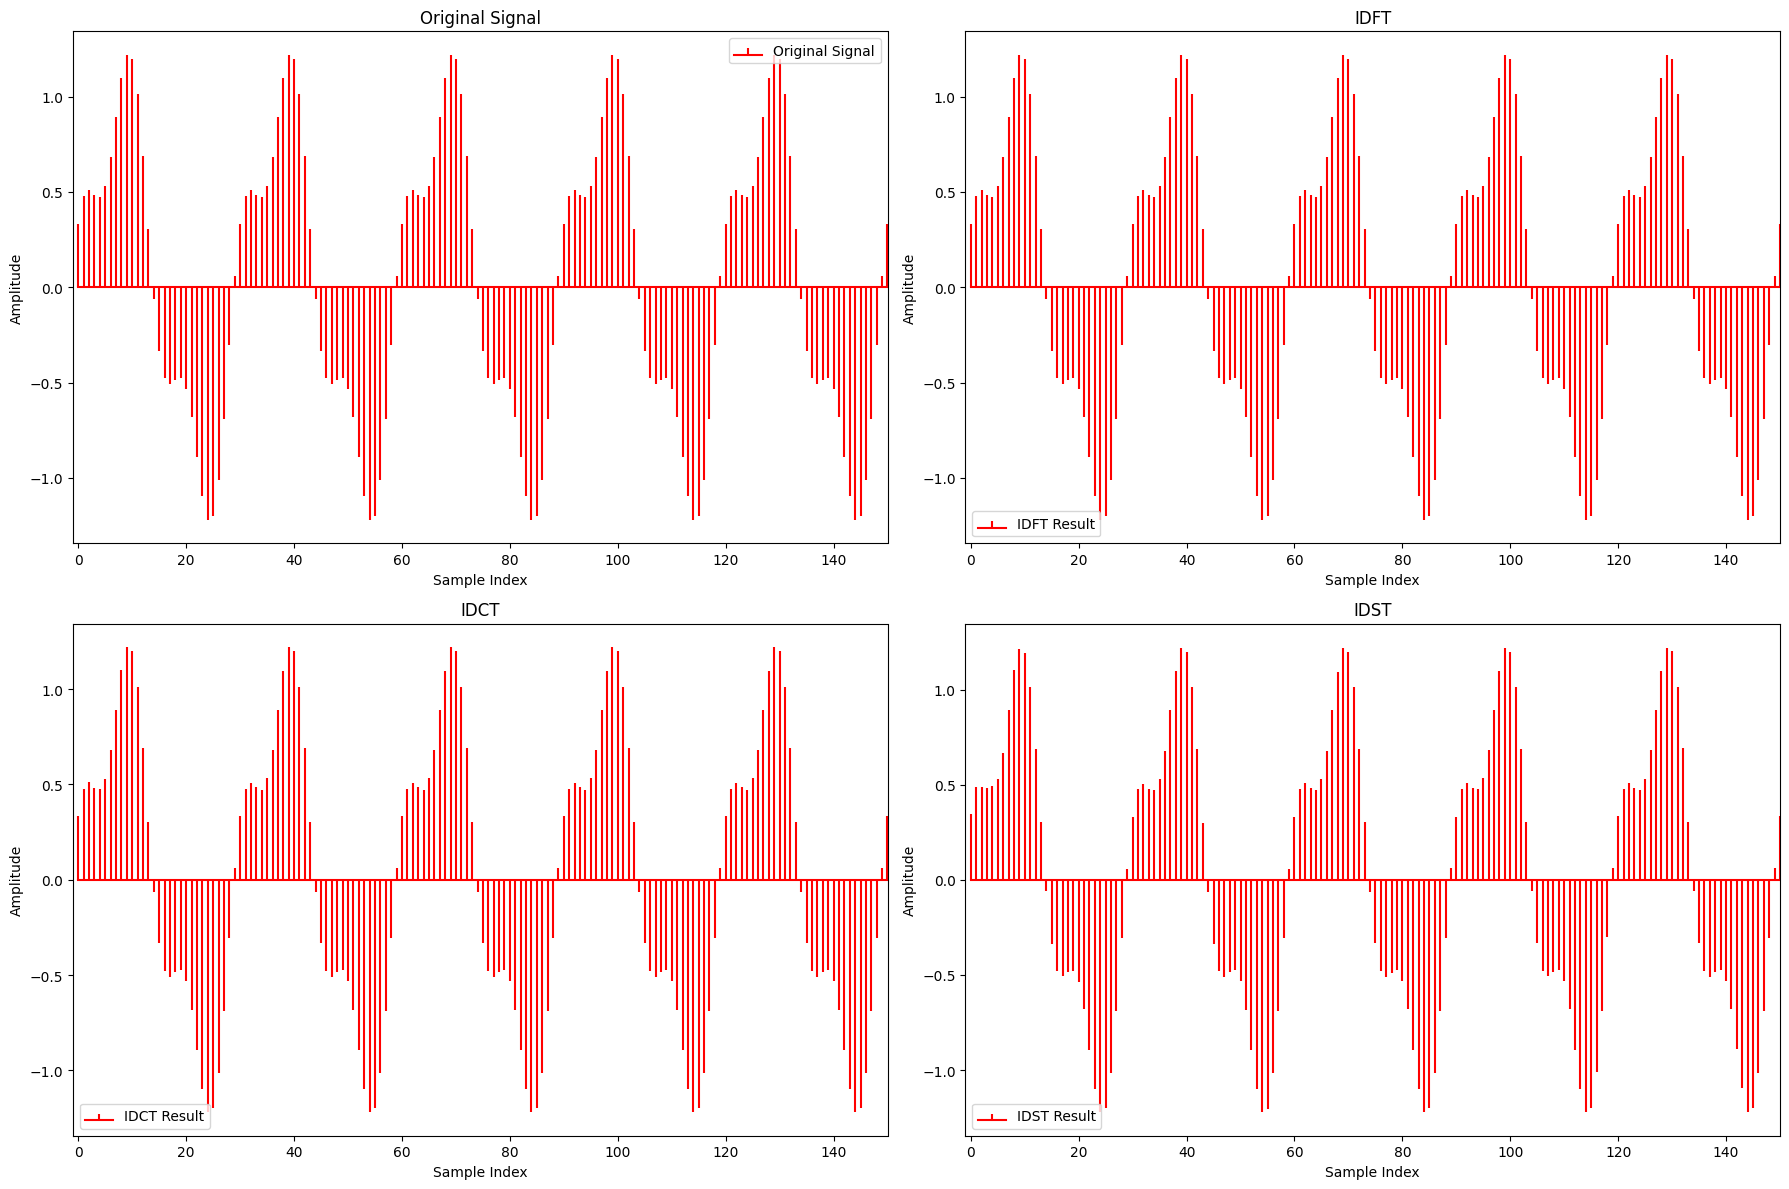

In [226]:
# Perform the comparison
compare_transforms(x_t, fs, 50)

C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_8700\4014572163.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n-1] += X_pos[k-1] * np.sin(np.pi * k * n / (N + 1))


Mean Squared Error between Original and Reconstructed Signal for 5% retention
MSE IDFT: 0.0000
MSE IDCT: 0.0015
MSE IDST: 0.0007


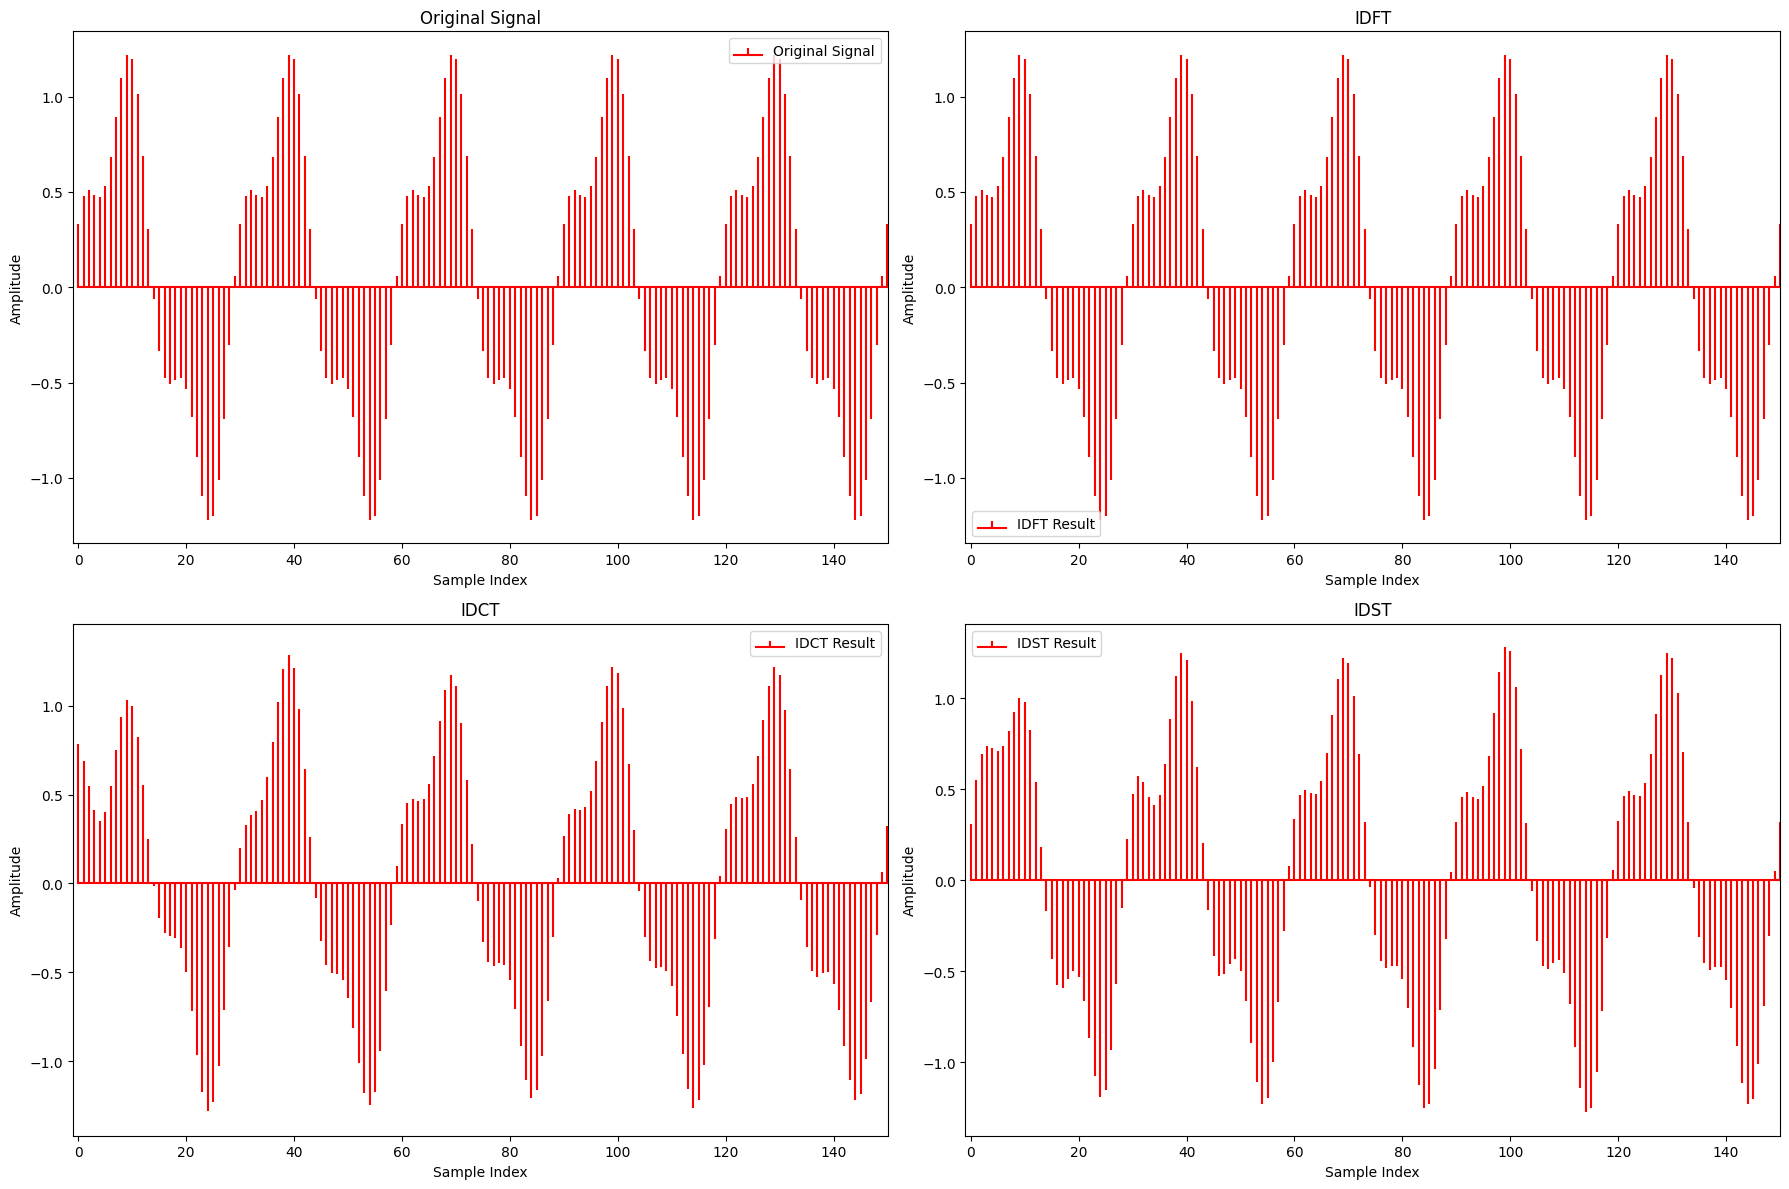

In [228]:
# Perform the comparison
compare_transforms(x_t, fs, 5)

## Operations on signal: 
Given Signal:
$$x[n] = \frac{1}{2^n} u[n]$$

In [164]:
n = np.arange(0, 100)
u = 0.5**n

Text(0, 0.5, 'x[n]')

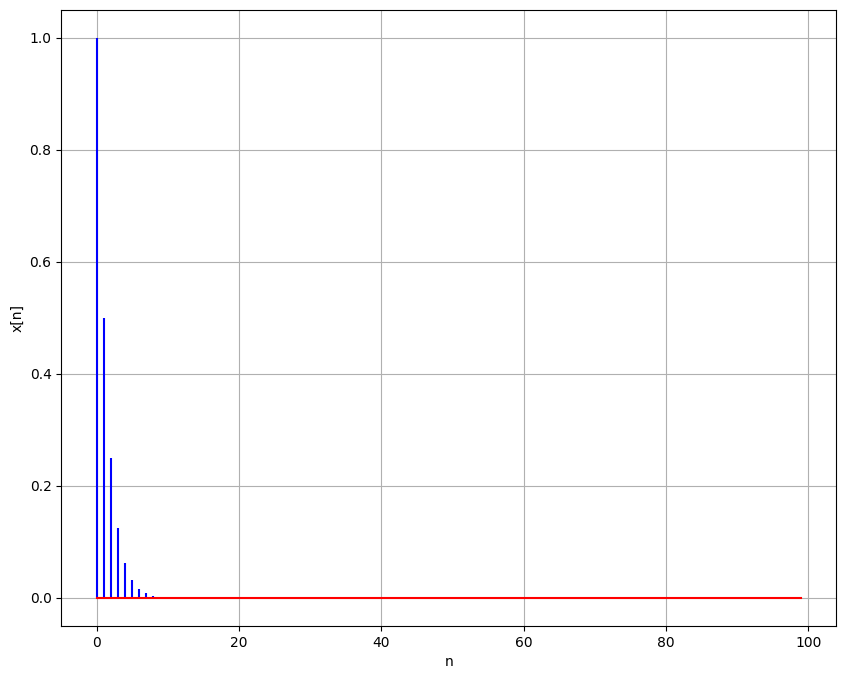

In [165]:
plt.figure(figsize=(10, 8))
plt.stem(n, u, linefmt='b-', markerfmt=' ', basefmt="red")
plt.grid()
plt.xlabel('n')

plt.ylabel('x[n]')

## Transformations: DFT, DCT, DST

Text(0.5, 1.0, 'DST: $X[k]$ vs. $k$')

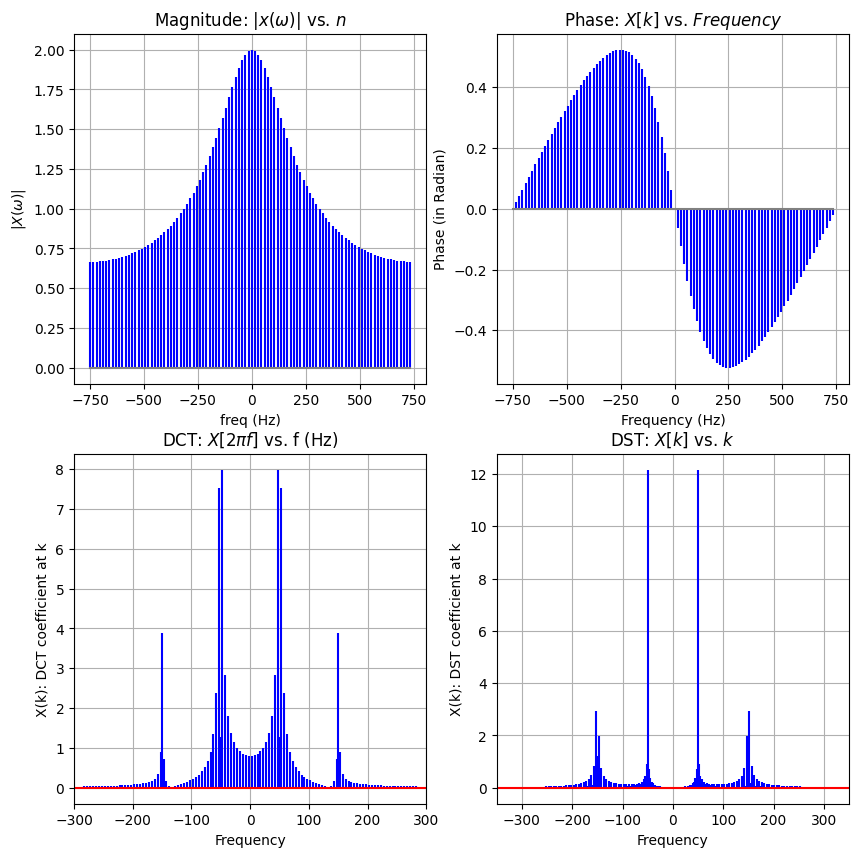

In [190]:
plt.figure(figsize=(10, 10), dpi=100)

u_dft, phase, freq = dft(u, fs=1500)

plt.subplot(2, 2, 1)
plt.stem(freq, np.abs(u_dft), linefmt='b-', markerfmt=' ', basefmt="gray")
plt.grid()
plt.xlabel('freq (Hz)')
plt.ylabel('$|X(\omega)|$')
plt.title('Magnitude: $|x(\omega)|$ vs. $n$')

plt.subplot(2, 2, 2)
plt.stem(freq, phase, linefmt='b-', markerfmt=' ', basefmt="gray")
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (in Radian)')
plt.title('Phase: $X[k]$ vs. $Frequency$')

u_dct, freq = DCT(x, fs=1500)

plt.subplot(2, 2, 3)
plt.stem(freq, np.abs(u_dct), linefmt='b-', markerfmt=' ', basefmt="red")
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('X(k): DCT coefficient at k')
plt.xlim(-300, 300)
plt.title('DCT: $X[2\pi f]$ vs. f (Hz)')

u_dst, freq = DST(x, fs=1500)

plt.subplot(2, 2, 4)
plt.stem(freq, np.abs(u_dst), linefmt='b-', markerfmt=' ', basefmt="red")
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('X(k): DST coefficient at k')
plt.xlim(-350, 350)
plt.title('DST: $X[k]$ vs. $k$')

## Compression and Reconstruction

C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_8700\4014572163.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n-1] += X_pos[k-1] * np.sin(np.pi * k * n / (N + 1))


Mean Squared Error between Original and Reconstructed Signal for 100% retention
MSE IDFT: 0.0000
MSE IDCT: 0.0000
MSE IDST: 0.0000


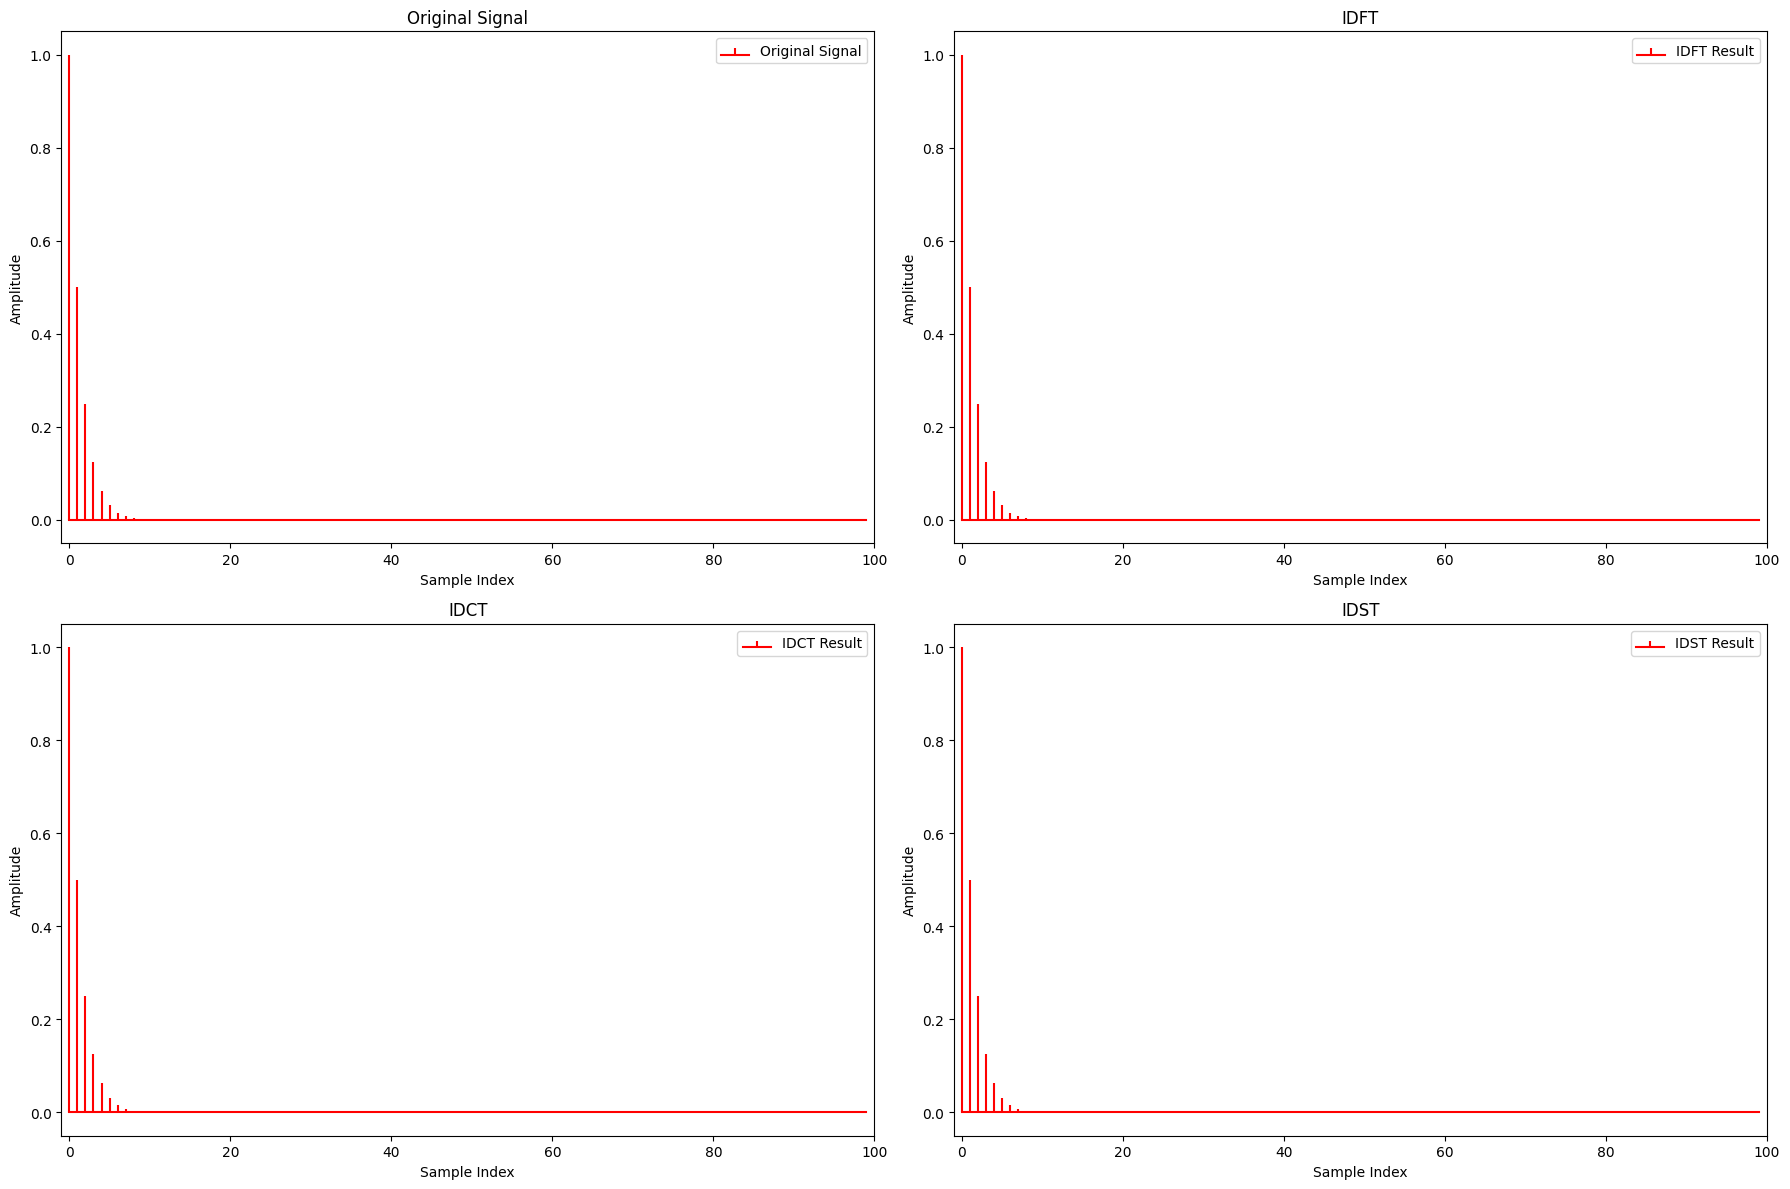

In [221]:
compare_transforms(u, fs=1500, p=100)

C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_8700\4014572163.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n-1] += X_pos[k-1] * np.sin(np.pi * k * n / (N + 1))


Mean Squared Error between Original and Reconstructed Signal for 90% retention
MSE IDFT: 0.0004
MSE IDCT: 0.0000
MSE IDST: 0.0000


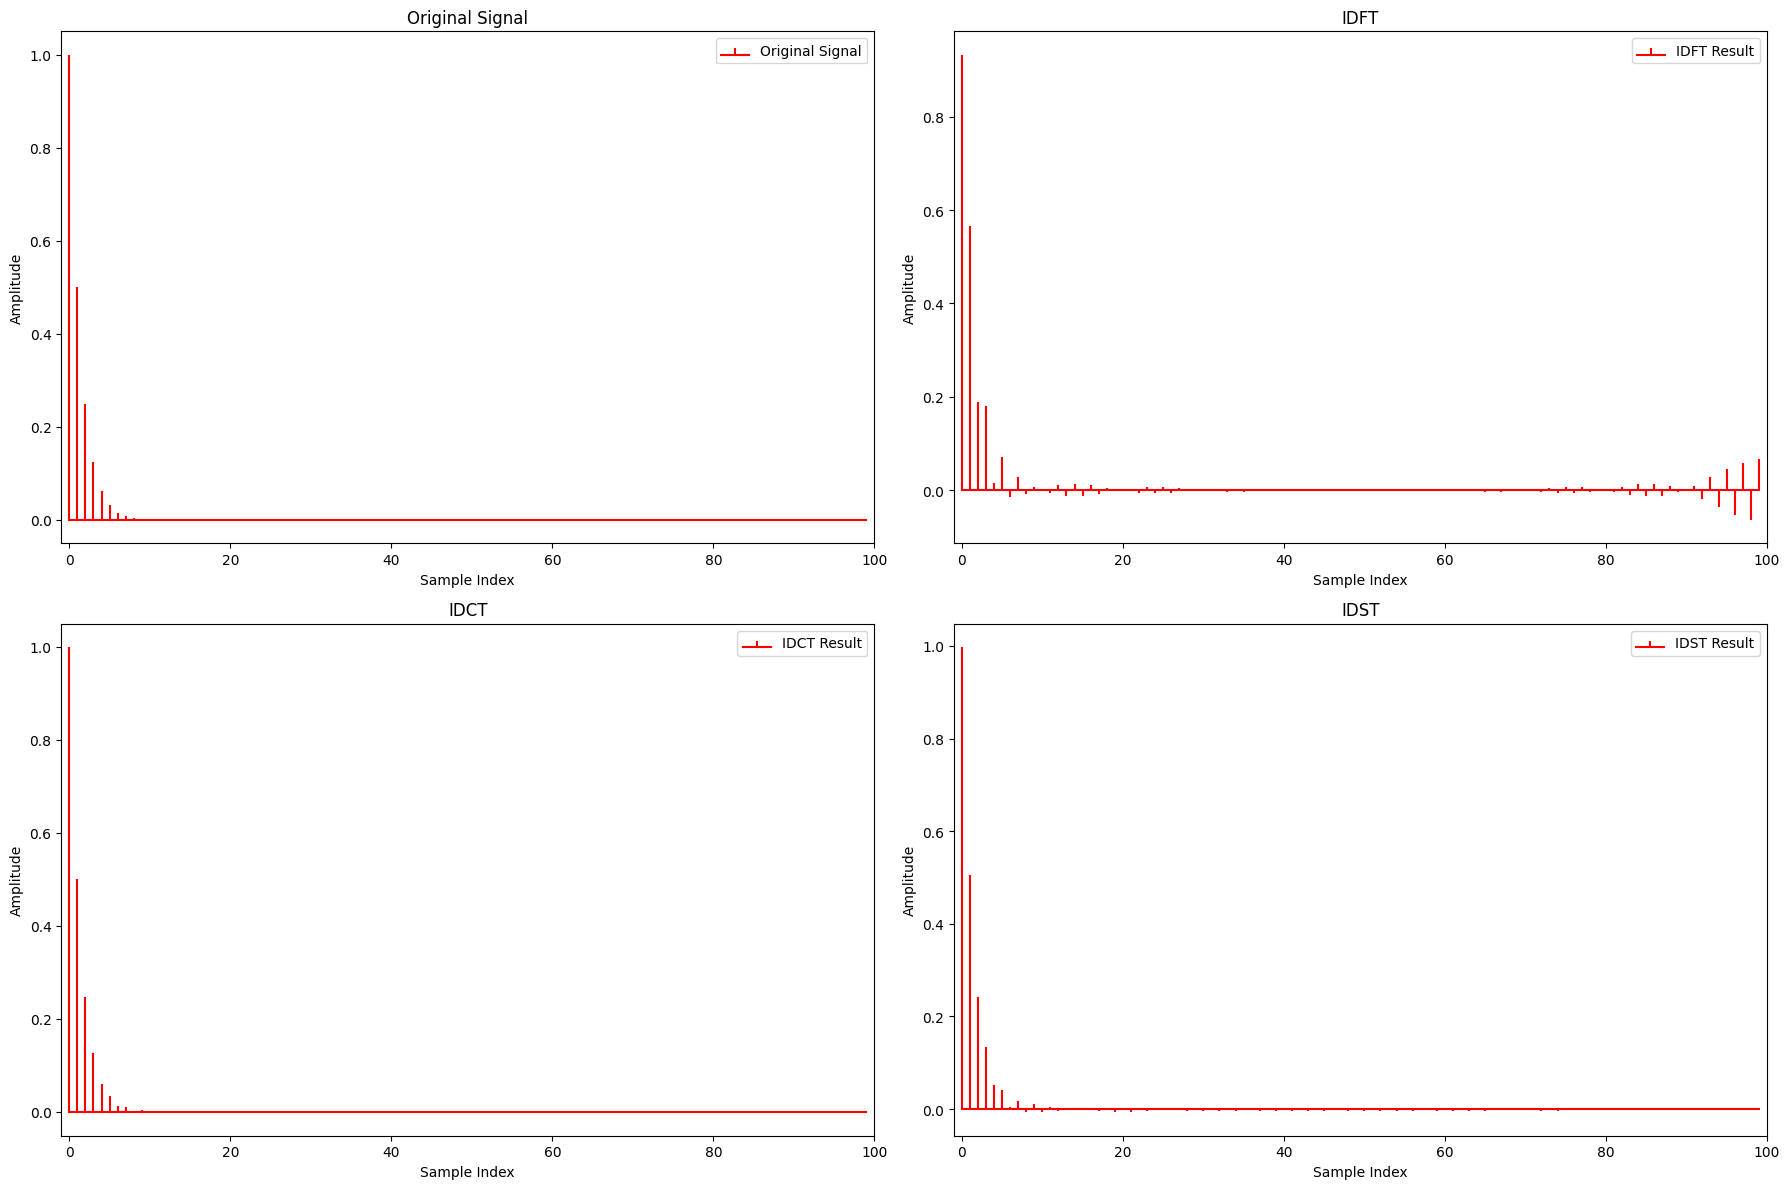

In [222]:
compare_transforms(u, fs, 90)

C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_8700\4014572163.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n-1] += X_pos[k-1] * np.sin(np.pi * k * n / (N + 1))


Mean Squared Error between Original and Reconstructed Signal for 75% retention
MSE IDFT: 0.0012
MSE IDCT: 0.0000
MSE IDST: 0.0002


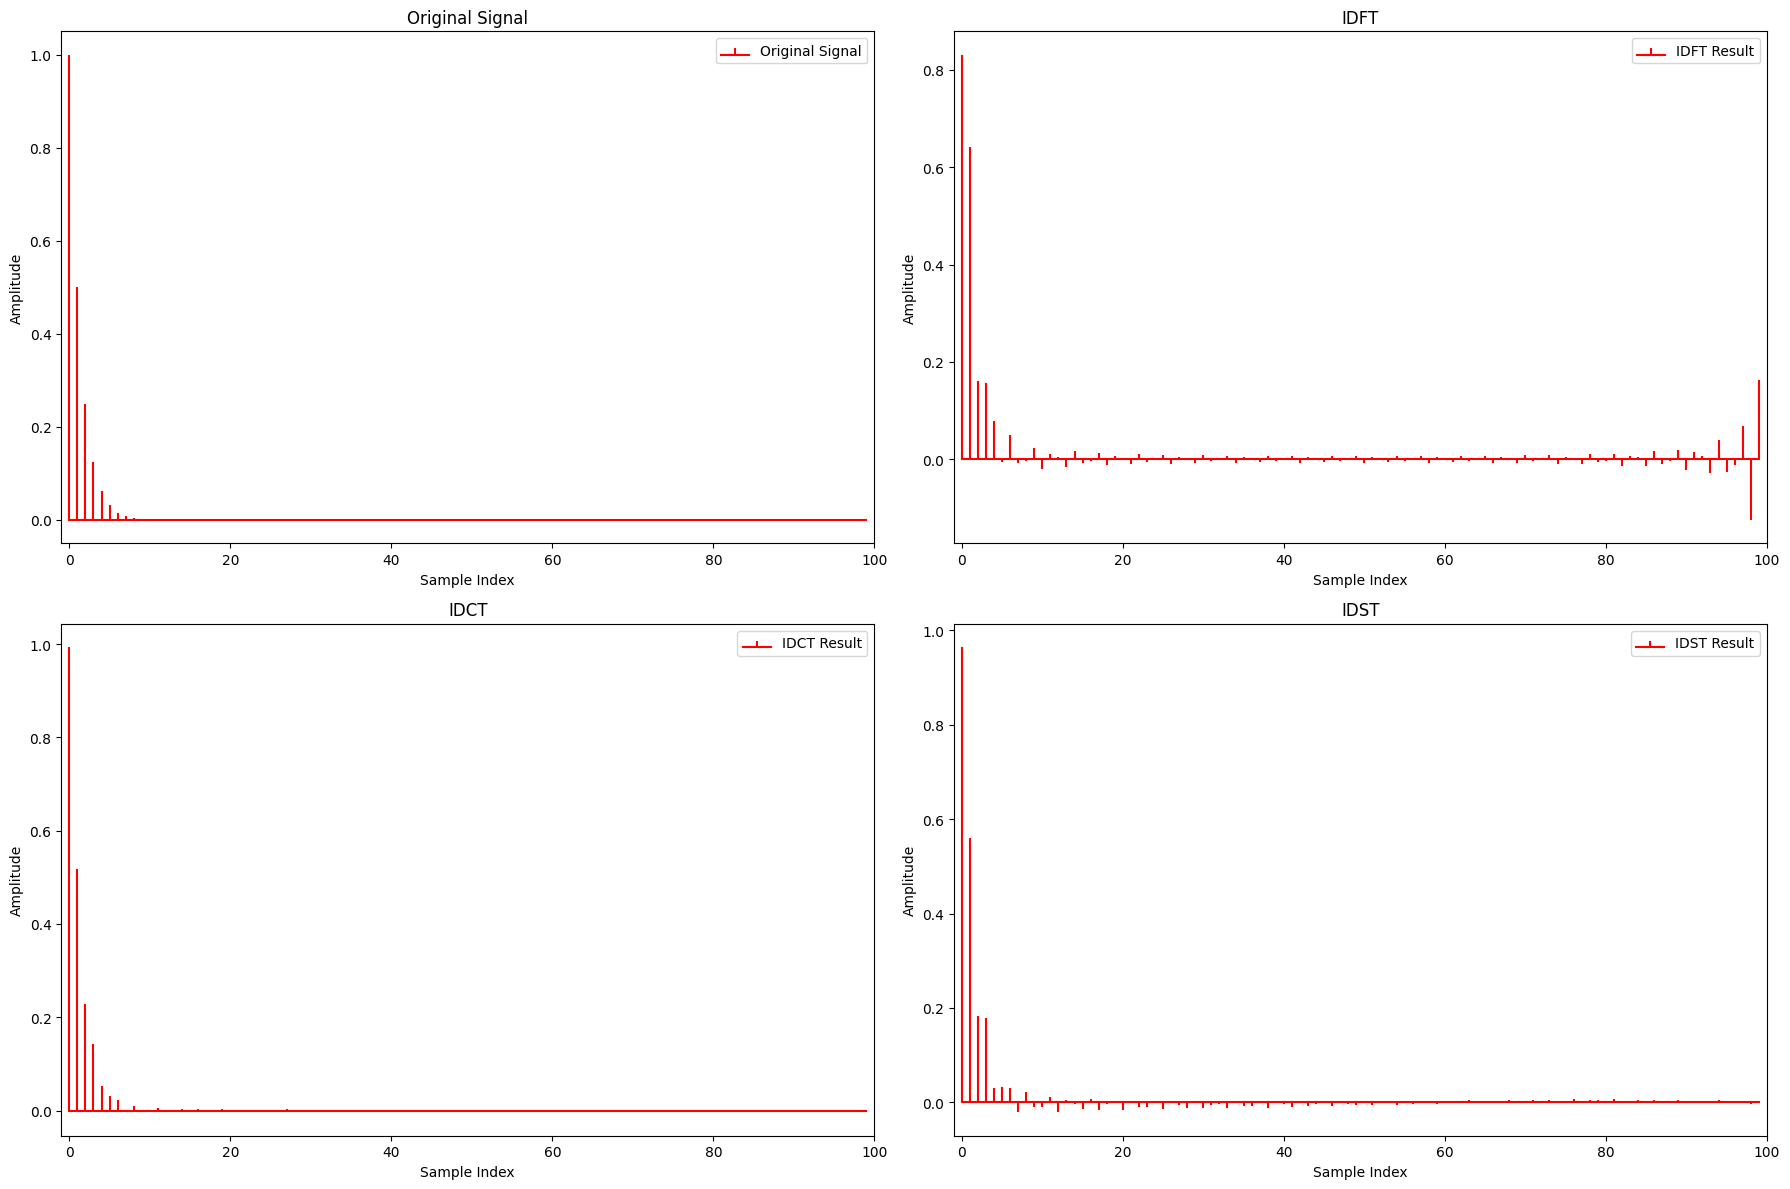

In [223]:
compare_transforms(u, fs, 75)

C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_8700\4014572163.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n-1] += X_pos[k-1] * np.sin(np.pi * k * n / (N + 1))


Mean Squared Error between Original and Reconstructed Signal for 45% retention
MSE IDFT: 0.0032
MSE IDCT: 0.0003
MSE IDST: 0.0020


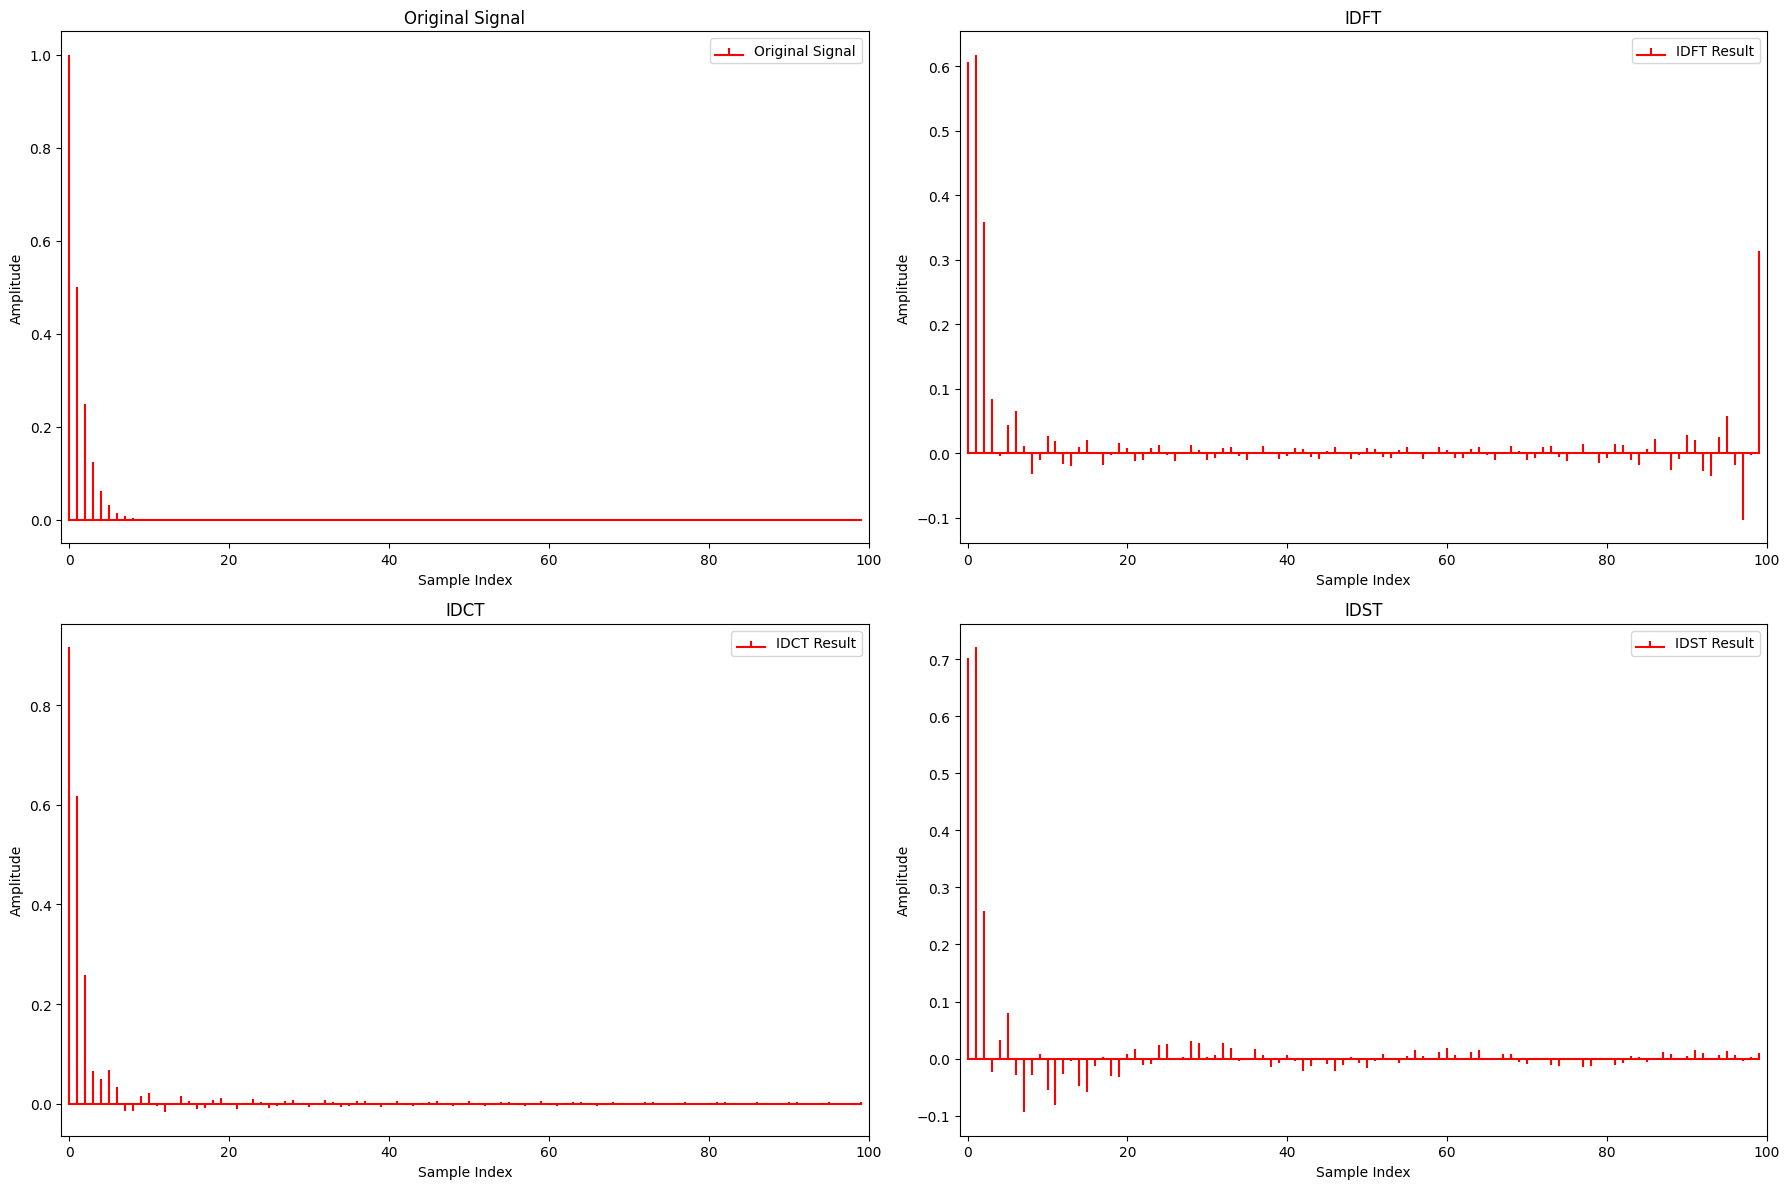

In [224]:
compare_transforms(u, fs, 45)

C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_8700\4014572163.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n-1] += X_pos[k-1] * np.sin(np.pi * k * n / (N + 1))


Mean Squared Error between Original and Reconstructed Signal for 15% retention
MSE IDFT: 0.0080
MSE IDCT: 0.0042
MSE IDST: 0.0083


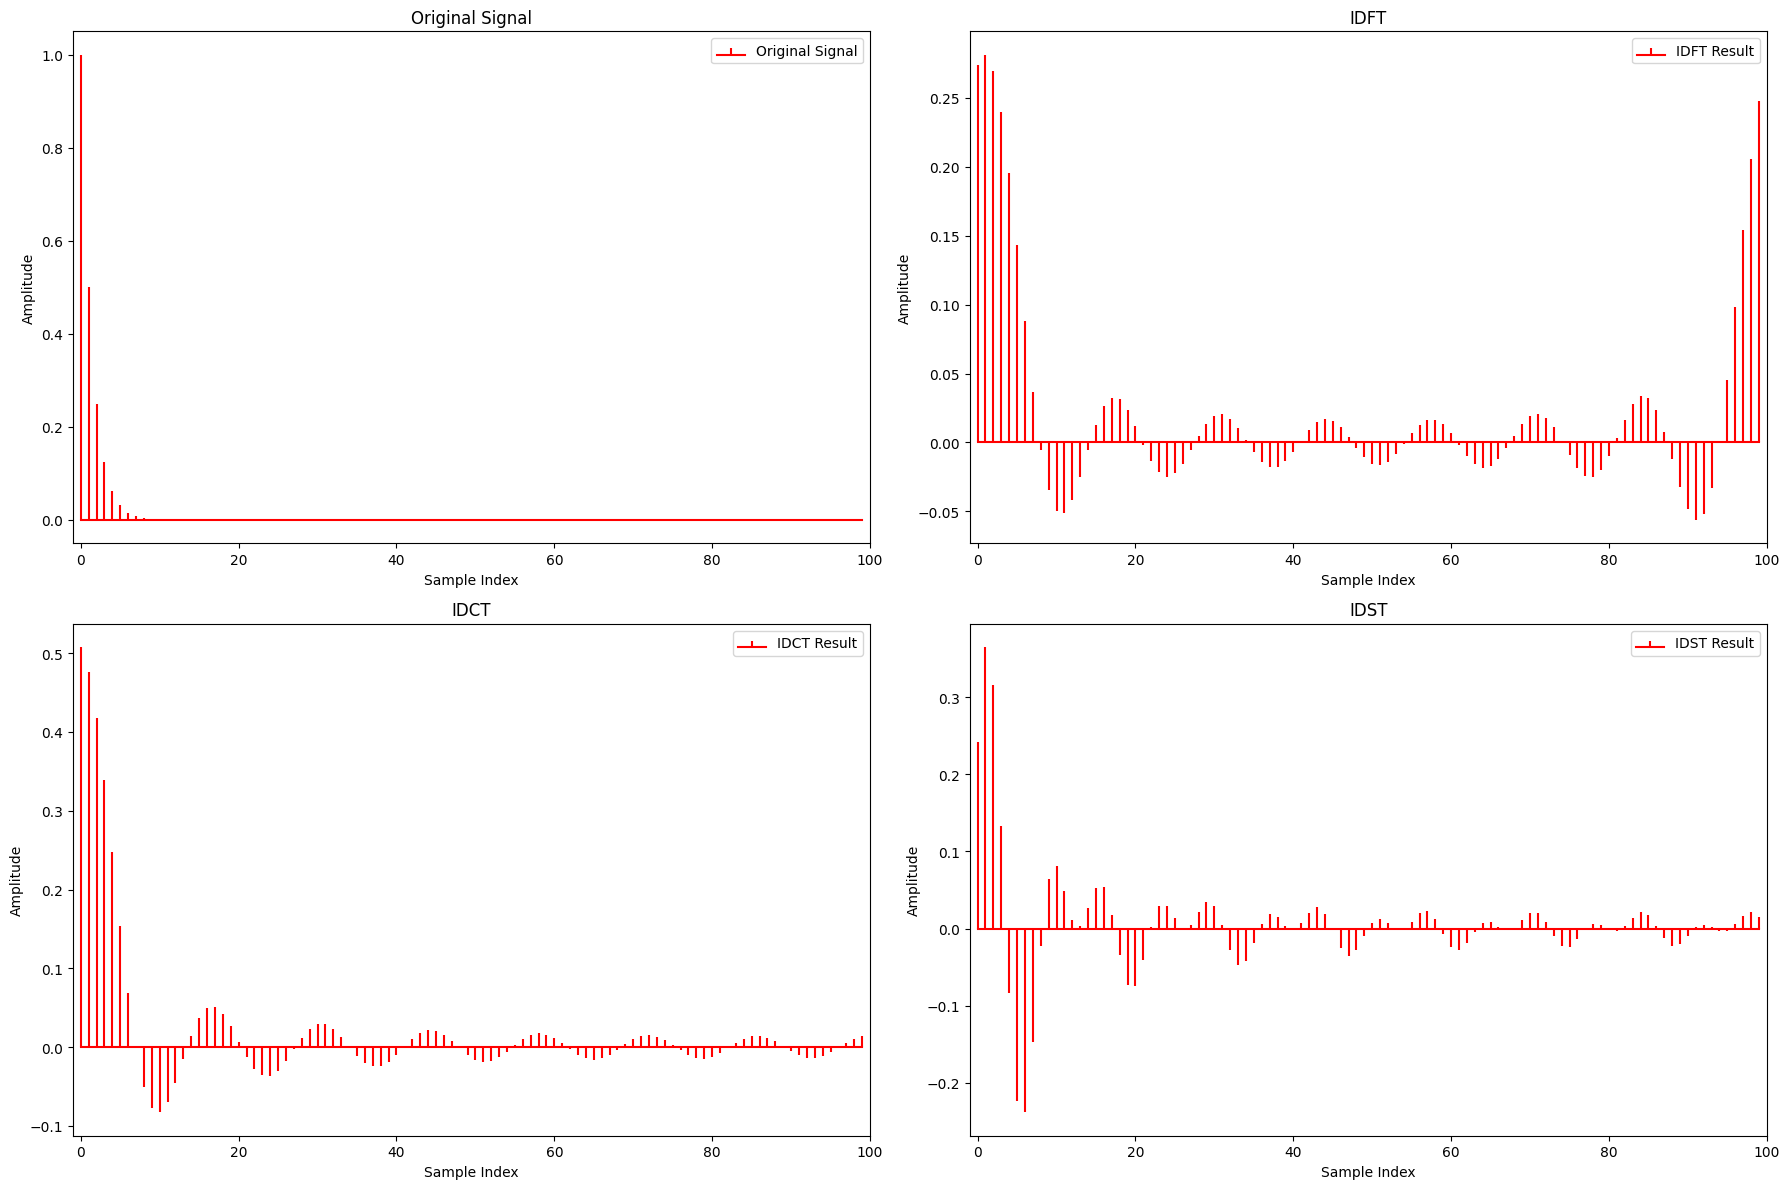

In [229]:
compare_transforms(u, fs, 15)